<a href="https://colab.research.google.com/github/renerubio/book-analysis/blob/main/all_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Parte: Análisis Cualitativo. Con nuestros datos
*   ¿Cuál fue el año en el que se publicaron más libros?
*   Muéstralo en un gráfico

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/ESTUDIOS/MASTER BIGDATA/Casos de Analítica/all_books.xlsx"

df = pd.read_excel(file_path)

df.head()


Mounted at /content/drive


,book_id_title,book_id,cover_image_uri,book_title,book_series,book_settings,book_characters,book_language,year_first_published,authorlink,...,num_pages,format,genres,people_curr_read,peop_want_to_read,num_ratings,num_reviews,average_rating,rating_distribution,awards
0,1.Harry_Potter_and_the_Half_Blood_Prince,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,['Harry Potter'],"['Hogwarts School of Witchcraft and Wizardry',...","['Ron Weasley', 'Petunia Dursley', 'Vernon Dur...",English,2005.0,https://www.goodreads.com/author/show/1077326....,...,652.0,Paperback,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",49.7k,567k,3484534,64286,4.58,"{'5 Stars': 2377725, '4 Stars': 819042, '3 Sta...",['Locus Award Nominee for Best Young Adult Nov...
1,10.Harry_Potter_Collection,10,https://images-na.ssl-images-amazon.com/images...,Harry Potter Collection,NaN,NaN,NaN,English,2005.0,https://www.goodreads.com/author/show/1077326....,...,3342.0,Hardcover,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",243,7253,34151,989,4.72,"{'5 Stars': 27420, '4 Stars': 4883, '3 Stars':...",[]
2,10009.Homo_Faber,10009,https://images-na.ssl-images-amazon.com/images...,Homo Faber,NaN,"['New York City, New York', 'Houston, Texas', ...","['Walter Faber', 'Sabeth', 'Hanna Piper', 'Joa...",English,1957.0,https://www.goodreads.com/author/show/6530.Max...,...,214.0,Paperback,"['Classics', 'Fiction', 'German Literature', '...",671,14.8k,29236,1115,3.69,"{'5 Stars': 7514, '4 Stars': 10323, '3 Stars':...",[]
3,1001896.The_Real_Mother_Goose,1001896,https://images-na.ssl-images-amazon.com/images...,The Real Mother Goose,NaN,NaN,NaN,English,1916.0,https://www.goodreads.com/author/show/48966.Bl...,...,128.0,Hardcover,"['Childrens', 'Poetry', 'Picture Books', 'Clas...",345,4300,36262,385,4.33,"{'5 Stars': 20466, '4 Stars': 9011, '3 Stars':...",[]
4,100247.Vagabonding,100247,https://images-na.ssl-images-amazon.com/images...,Vagabonding: An Uncommon Guide to the Art of L...,NaN,NaN,NaN,English,2002.0,https://www.goodreads.com/author/show/57862.Ro...,...,205.0,Paperback,"['Travel', 'Nonfiction', 'Philosophy', 'Self H...",1900,72.4k,27224,1605,3.95,"{'5 Stars': 9410, '4 Stars': 9615, '3 Stars': ...",[]


In [3]:
# Convertir la columna a tipo numérico
df["year_first_published"] = pd.to_numeric(df["year_first_published"], errors="coerce")

# Eliminar valores nulos
df_cleaned = df.dropna(subset=["year_first_published"])

# Convertir a entero
df_cleaned["year_first_published"] = df_cleaned["year_first_published"].astype(int)


<ipython-input-3-44e4b29d81fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["year_first_published"] = df_cleaned["year_first_published"].astype(int)


In [4]:
# Contar cuántos libros hay por año
year_counts = df_cleaned["year_first_published"].value_counts().sort_index()

# Mostrar los 10 años con más publicaciones
print(year_counts.sort_values(ascending=False).head(10))


year_first_published
2018    46
2017    41
1962    26
1961    23
2016    22
2009    21
2000    20
1957    20
2002    20
1985    19
Name: count, dtype: int64


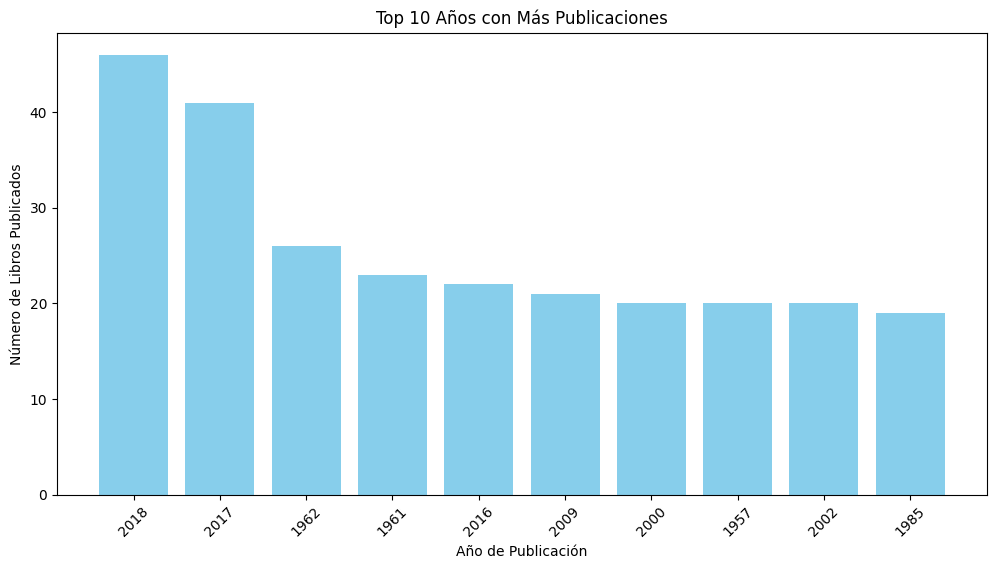

In [5]:
import matplotlib.pyplot as plt

# Obtener los 10 años con más publicaciones
top_10_years = year_counts.sort_values(ascending=False).head(10)

# Ordenar por número de publicaciones de mayor a menor
top_10_years = top_10_years.sort_values(ascending=False)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.bar(top_10_years.index.astype(str), top_10_years.values, color="skyblue")

# Etiquetas y título
plt.xlabel("Año de Publicación")
plt.ylabel("Número de Libros Publicados")
plt.title("Top 10 Años con Más Publicaciones")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura

# Mostrar la gráfica
plt.show()



* ¿Y el autor más prolífico?
* ¿Cuántos libros suyos hay en el dataset?




In [6]:
# Contar la cantidad de libros por autor (la cantidad de repeticiones por autor)
author_counts = df_cleaned["author"].value_counts()

# Obtener el autor con más libros (el autor que más se repite)
most_prolific_author = author_counts.idxmax()
# y la cantidad de libros que tiene (cuantas veces se repite el autor)
num_books_by_author = author_counts.max()

# Mostrar el resultado
print(f"El autor más prolífico es {most_prolific_author}, con un total de {num_books_by_author} libros.")

El autor más prolífico es Edgar Rice Burroughs, con un total de 38 libros.


# ¿Qué palabras clave o elementos están más asociados con las altas puntuaciones?

Antes vamos a transformar los datos a numéricos ya que hay algunos valores que usan "k" para miles y "m" para millones.

In [8]:
# Función para convertir valores tipo "49.7k" a 49700 y "1m" a 1000000
def convert_to_numeric(value):
    if isinstance(value, str):  # Verifica si el valor es una cadena
        value = value.lower().replace(",", "").strip()  # Elimina comas y espacios extra
        if "k" in value:
            return float(value.replace("k", "")) * 1_000  # Convierte "k" a miles
        elif "m" in value:
            return float(value.replace("m", "")) * 1_000_000  # Convierte "m" a millones
    try:
        return int(value)  # Intenta convertir directamente a número
    except ValueError:
        return None  # Si falla, devuelve None (para identificar valores erróneos)

# Aplicar la función a las columnas en el DataFrame
df_cleaned["people_curr_read"] = df_cleaned["people_curr_read"].apply(convert_to_numeric)
df_cleaned["peop_want_to_read"] = df_cleaned["peop_want_to_read"].apply(convert_to_numeric)

# Verificar la conversión
print(df_cleaned[["people_curr_read", "peop_want_to_read"]].head())

   people_curr_read  peop_want_to_read
0           49700.0           567000.0
1             243.0             7253.0
2             671.0            14800.0
3             345.0             4300.0
4            1900.0            72400.0


<ipython-input-8-204fd89ad339>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["people_curr_read"] = df_cleaned["people_curr_read"].apply(convert_to_numeric)
<ipython-input-8-204fd89ad339>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["peop_want_to_read"] = df_cleaned["peop_want_to_read"].apply(convert_to_numeric)


Ahora después de la conversión vamos a revisar cuantos valores nulos tenemos

In [9]:
# Contar cuántos valores nulos que hay en las columnas "people_curr_read" y "peop_want_to_read"
none_counts = df_cleaned[["people_curr_read", "peop_want_to_read"]].isnull().sum()
print(none_counts)

people_curr_read     53
peop_want_to_read    53
dtype: int64


Vemos varios valores nulos, para intentar ser más precisos usaremos un modelo de regresión. Si "people_curr_read" y "peop_want_to_read" están correlacionados con "average_rating", podríamos predecir el valor más probable.

In [10]:
from sklearn.linear_model import LinearRegression

# Ver la correlación para confirmar que tiene sentido hacer la predicción
print(df_cleaned[["people_curr_read", "peop_want_to_read", "average_rating"]].corr())

# Filtrar datos completos (sin valores nulos)
df_complete = df_cleaned.dropna(subset=["people_curr_read", "peop_want_to_read", "average_rating"])

# Entrenar modelo para predecir "people_curr_read"
X = df_complete[["average_rating"]]
y = df_complete["people_curr_read"]

model_reading = LinearRegression()
model_reading.fit(X, y)

# Obtener índices de los valores nulos en "people_curr_read"
missing_reading_index = df_cleaned[df_cleaned["people_curr_read"].isnull()].index

# Predecir valores faltantes y convertirlo en una Serie con el mismo índice
predicted_reading = pd.Series(model_reading.predict(df_cleaned.loc[missing_reading_index, ["average_rating"]]), index=missing_reading_index)

# Asignar valores predichos
df_cleaned.loc[missing_reading_index, "people_curr_read"] = predicted_reading

# --- Mismo proceso para "peop_want_to_read" ---
y_want_to_read = df_complete["peop_want_to_read"]
model_want_to_read = LinearRegression()
model_want_to_read.fit(X, y_want_to_read)

# Obtener índices de los valores nulos en "peop_want_to_read"
missing_want_to_read_index = df_cleaned[df_cleaned["peop_want_to_read"].isnull()].index

# Predecir valores faltantes y convertirlo en una Serie con el mismo índice
predicted_want_to_read = pd.Series(model_want_to_read.predict(df_cleaned.loc[missing_want_to_read_index, ["average_rating"]]), index=missing_want_to_read_index)

# Asignar valores predichos
df_cleaned.loc[missing_want_to_read_index, "peop_want_to_read"] = predicted_want_to_read


                   people_curr_read  peop_want_to_read  average_rating
people_curr_read           1.000000           0.824683        0.127276
peop_want_to_read          0.824683           1.000000        0.120312
average_rating             0.127276           0.120312        1.000000


Comprobamos si los nulos aún existen

In [11]:
# Contar cuántos valores nulos que hay en las columnas "people_curr_read" y "peop_want_to_read"
none_counts = df_cleaned[["people_curr_read", "peop_want_to_read"]].isnull().sum()
print(none_counts)

people_curr_read     0
peop_want_to_read    0
dtype: int64


In [12]:
# Ordenar los libros por average_rating de mayor a menor
df_sorted_by_rating = df_cleaned.sort_values(by="average_rating", ascending=False)

# Ordenar los libros por reviews de mayor a menor
df_sorted_by_reviews = df_cleaned.sort_values(by="num_reviews", ascending=False)

# Ordenar los libros por ratings de mayor a menor
df_sorted_by_ratings = df_cleaned.sort_values(by="num_ratings", ascending=False)

# Ordenar los libros por "más leídos actualmente"
df_sorted_by_reading = df_cleaned.sort_values(by="people_curr_read", ascending=False)

# Ordenar los libros por "más intención de leer"
df_sorted_by_want_to_read = df_cleaned.sort_values(by="peop_want_to_read", ascending=False)


# Mostrar los 10 libros con mejores calificaciones
print("Top 10 libros con mejor calificación:")
print(df_sorted_by_rating[["book_title", "num_ratings", "average_rating"]].head(10))

# Mostrar los 10 libros con más reviews
print("\n Top 10 libros con más reviews:")
print(df_sorted_by_reviews[["book_title", "num_reviews"]].head(10))

# Mostrar los 10 libros con más calificaciones
print("\n Top 10 libros con más calificaciones:")
print(df_sorted_by_ratings[["book_title", "num_ratings"]].head(10))

# Mostrar los 10 libros más leídos actualmente
print("\n Top 10 libros más leídos actualmente:")
print(df_sorted_by_reading[["book_title", "people_curr_read"]].head(10))

# Mostrar los 10 libros con más intención de leer
print("\n Top 10 libros con más intención de leer:")
print(df_sorted_by_want_to_read[["book_title", "peop_want_to_read"]].head(10))

Top 10 libros con mejor calificación:
                                             book_title  num_ratings  \
1068               Confessions of a quarter life crisis            1   
978                               Empower Now for Women            3   
1293  The Book about IT Leadership that is not reall...            3   
975   The Write Prescription: Finding the "Right" Sp...            1   
970   Naked Soul: A Poetic Expression of the Mind, H...            1   
967   Reggae Larger Than Life: The Ultimate Reggae M...            1   
1034                             Zoey Searches for Zero            1   
1012                       The Mixed World in a Kingdom            1   
966        The 'Real World' Guide to Digital Filmmaking            1   
1073  The Cancer Quandary: A Thirty eight year survi...            1   

      average_rating  
1068             5.0  
978              5.0  
1293             5.0  
975              5.0  
970              5.0  
967              5.0  
1034    

Aquí se aprecia que las puntuaciones por encima de 4.5 parecen tener sesgo ya que el número de votaciones es muy bajo, vamos a revisarlo con un diagrama de dispersión, se ajusta la xscale a logarítmica para ver mejor la relación.

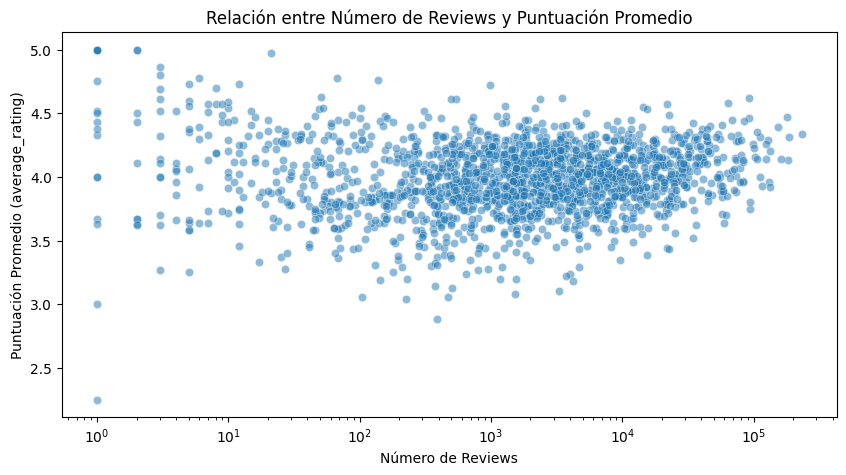

In [13]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=df_cleaned["num_reviews"], y=df_cleaned["average_rating"], alpha=0.5)
plt.xscale("log")  # Usar escala logarítmica
plt.xlabel("Número de Reviews")
plt.ylabel("Puntuación Promedio (average_rating)")
plt.title("Relación entre Número de Reviews y Puntuación Promedio")
plt.show()


Vamos a identificar el total de "num_reviews" por cada "average_rating"

In [14]:
# Agrupar por average_rating y sumar el total de num_reviews por cada grupo
grouped_reviews = df_cleaned.groupby("average_rating")["num_reviews"].sum().reset_index()

# Ordenar los resultados por average_rating de mayor a menor
grouped_reviews = grouped_reviews.sort_values(by="average_rating", ascending=False)

# Mostrar los resultados
print(grouped_reviews)



     average_rating  num_reviews
161            5.00            8
160            4.97           21
159            4.86            3
158            4.80            3
157            4.78           73
..              ...          ...
4              3.06          573
3              3.04          224
2              3.00            1
1              2.88          388
0              2.25            1

[162 rows x 2 columns]


Vamos descartar las average_rating que tienen un número atípicamente bajo de num_reviews. Esto ayuda a evitar que libros con muy pocas reseñas sesguen el análisis, ya que un average_rating de 5.0 con solo 1 o 2 reseñas no es representativo.

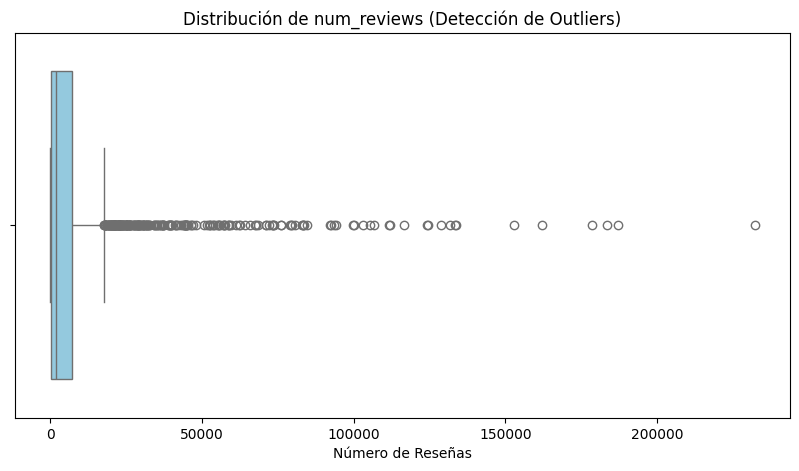

In [15]:
# Crear un boxplot para visualizar los outliers en num_reviews
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned["num_reviews"], color="skyblue")

# Título y etiquetas
plt.title("Distribución de num_reviews (Detección de Outliers)")
plt.xlabel("Número de Reseñas")

plt.show()

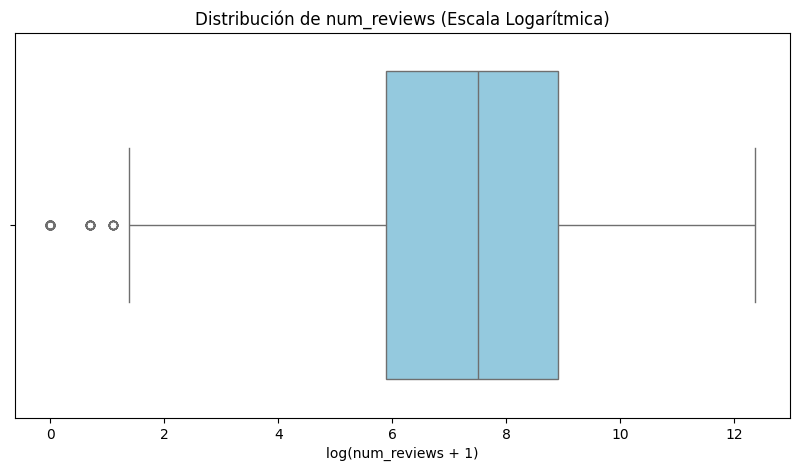

In [16]:
import numpy as np

plt.figure(figsize=(10, 5))
sns.boxplot(x=np.log1p(df_cleaned["num_reviews"]), color="skyblue")  # log1p evita log(0)
plt.title("Distribución de num_reviews (Escala Logarítmica)")
plt.xlabel("log(num_reviews + 1)")  # +1 para evitar log(0)
plt.show()

Aquí aplicamos el método del rango intercuartil (IQR) para filtrar los valores atípicos. Al resultado filtramos los num_ratings menores de 50.


In [20]:
# Función para eliminar outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar la función a las columnas num_reviews y num_ratings
df_filtered = remove_outliers(df_cleaned, "num_reviews")
df_filtered = remove_outliers(df_filtered, "num_ratings")

# Filtrar libros con menos de 50
df_filtered = df_filtered[df_filtered["num_ratings"] > 50]

# Mostrar información sobre la reducción de datos
print(f"Cantidad de libros antes de eliminar outliers: {len(df_cleaned)}")
print(f"Cantidad de libros después de eliminar outliers y filtrar pocos ratings: {len(df_filtered)}")

# Ordenar por average_rating para verificar si aún hay valores altos con pocas reseñas
df_sorted_by_rating_filtered = df_filtered.sort_values(by="average_rating", ascending=False)
print(df_sorted_by_rating_filtered[["book_title", "num_ratings", "average_rating"]].head(10))




Cantidad de libros antes de eliminar outliers: 1807
Cantidad de libros después de eliminar outliers y filtrar pocos ratings: 1307
                                          book_title  num_ratings  \
1071              OKINAWA DIET: THE LONGEVITY SECRET           58   
1112                                    Spyder Bones          134   
82               Master and Commander: 20 Volume Set         1318   
1356                                Females of Valor          105   
1                            Harry Potter Collection        34151   
1355                Zoroastrians' Fight for Survival          116   
1359                         Roots of To-Be Templars           51   
804   Before we were immigrants: So long, Yugoslavia           76   
720            Holy Bible: New International Version        92860   
1280                                Strength to Love         4090   

      average_rating  
1071            4.97  
1112            4.78  
82              4.76  
1356            4.

Crear una nueva columna que indique si el libro tiene premios

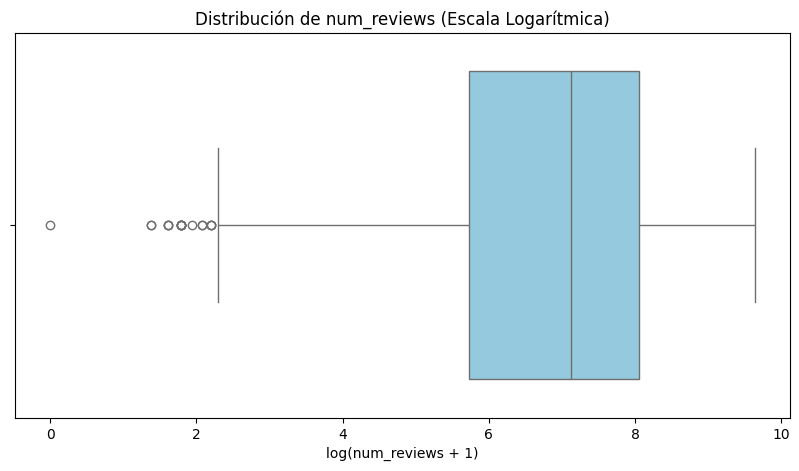

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=np.log1p(df_filtered["num_reviews"]), color="skyblue")  # log1p evita log(0)
plt.title("Distribución de num_reviews (Escala Logarítmica)")
plt.xlabel("log(num_reviews + 1)")  # +1 para evitar log(0)
plt.show()

In [57]:
# Crear una nueva columna con la cantidad de elementos en 'awards'
df_filtered["awards_count"] = df_filtered["awards"].apply(len)

# Comprobar el resultado
print(df_filtered[["awards", "awards_count"]].head())

# Filtrar libros con average_rating >= 4.5
high_rated_books = df_filtered[df_filtered["average_rating"] >= 4.5]

# Calcular estadísticas
summary = high_rated_books[["people_curr_read", "peop_want_to_read", "awards_count"]].mean()

print("Promedio de valores para libros con average_rating >= 4.5:")
print(summary)

                                              awards  awards_count
1                                                 []             2
2                                                 []             2
3                                                 []             2
4                                                 []             2
7  ['Whitbread Award for Biography (2004)', 'Nati...           139
Promedio de valores para libros con average_rating >= 4.5:
people_curr_read      2231.504815
peop_want_to_read    17489.839755
awards_count             4.142857
dtype: float64


Vamos a ver si hay correlación visualmente

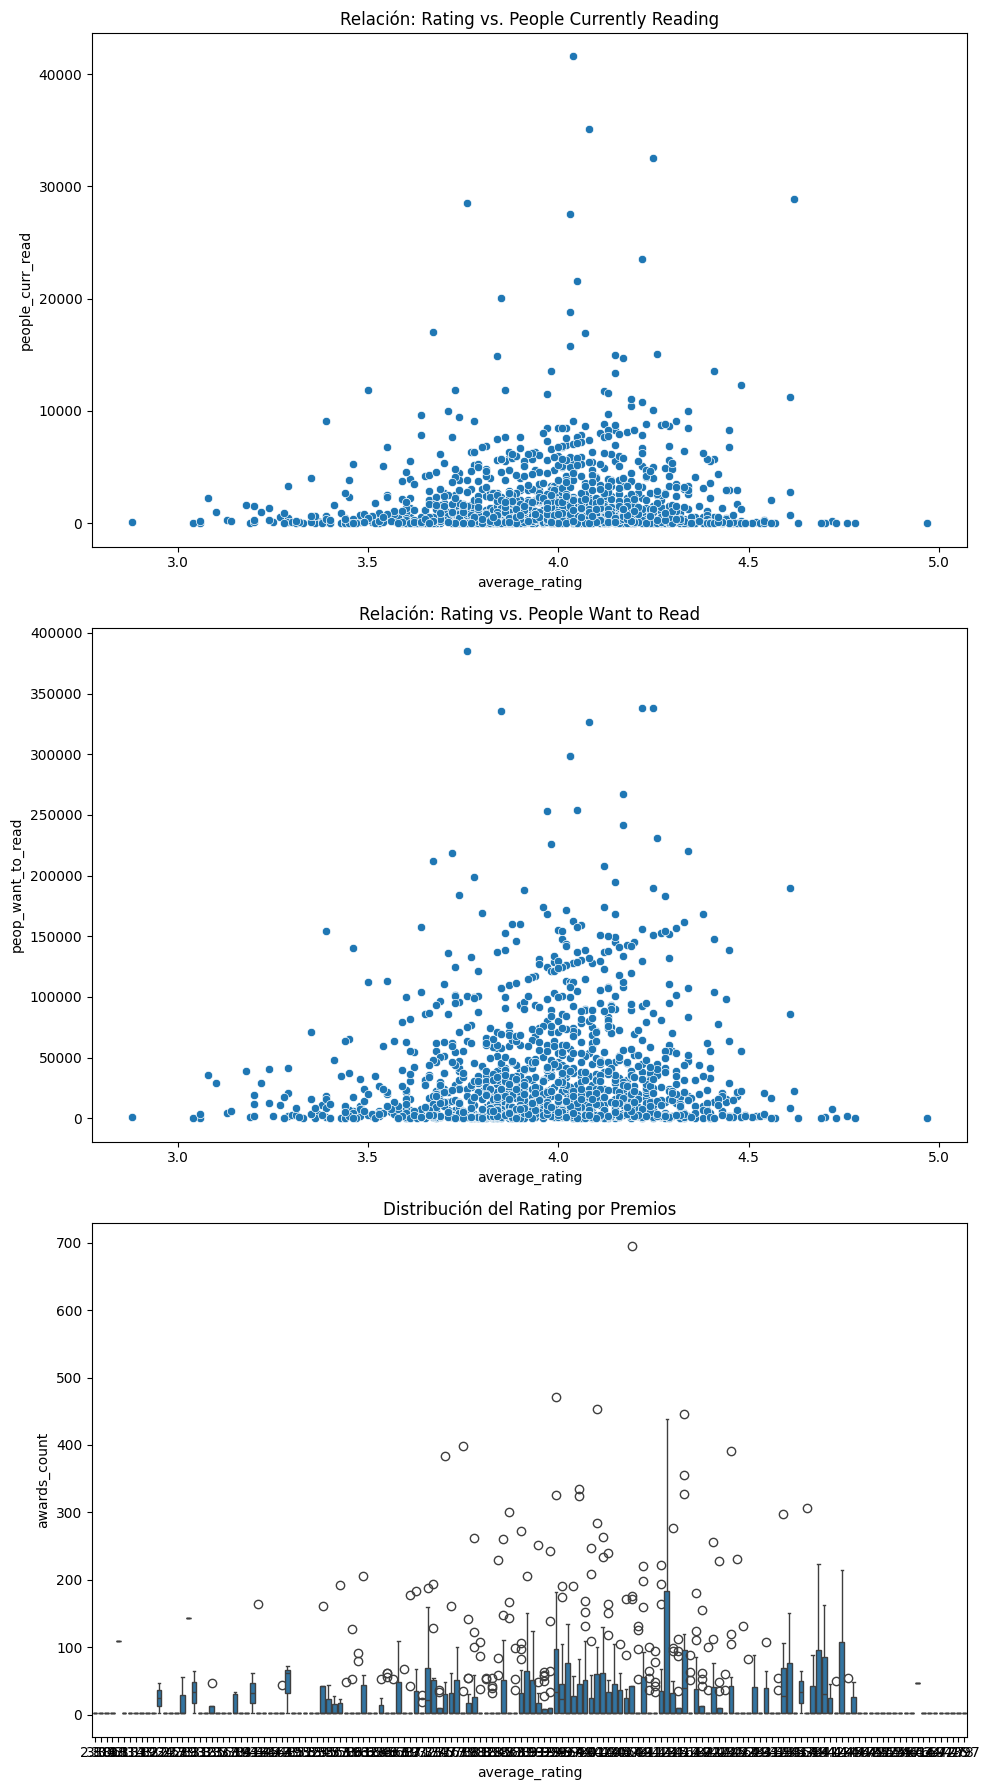

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_filtered['awards_bins'] = pd.cut(df_filtered['awards_count'], bins=5)

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.scatterplot(
    data=df_filtered,
    x="average_rating",
    y="people_curr_read",
    ax=axes[0]
)
axes[0].set_title("Relación: Rating vs. People Currently Reading")

sns.scatterplot(
    data=df_filtered,
    x="average_rating",
    y="peop_want_to_read",
    ax=axes[1]
)
axes[1].set_title("Relación: Rating vs. People Want to Read")

sns.boxplot(
    data=df_filtered,
    x="average_rating",
    y="awards_bins",
    ax=axes[2]
)
axes[2].set_title("Distribución del Rating por Premios")

plt.tight_layout()
plt.show()



Calcular la correlación numérica entre estas variables

In [35]:
correlation_matrix = df_filtered[["average_rating", "people_curr_read", "peop_want_to_read", "awards_count"]].corr()
print(correlation_matrix)

                   average_rating  people_curr_read  peop_want_to_read  \
average_rating           1.000000          0.115433           0.102885   
people_curr_read         0.115433          1.000000           0.805443   
peop_want_to_read        0.102885          0.805443           1.000000   
awards_count             0.053286          0.179712           0.238905   

                   awards_count  
average_rating         0.053286  
people_curr_read       0.179712  
peop_want_to_read      0.238905  
awards_count           1.000000  


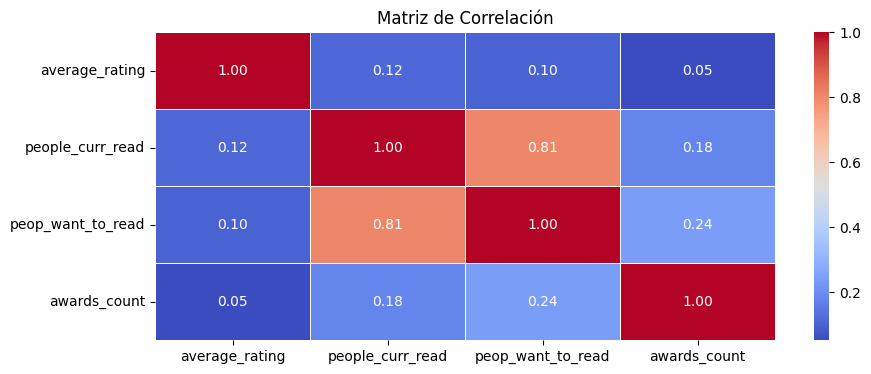

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

# Crear un heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()
